### Logistic Regression model
---
Logistic Regression is a **classification model**.<br>
It is used to predict categorical outcomes, most commonly:
~~~
Binary classification → 0 / 1, Yes / No, Spam / Not Spam
~~~
Dataset used is Titanic

In [1]:
import pandas as pd
from sklearn.datasets import fetch_openml
import seaborn as sns

In [2]:
df = fetch_openml('titanic', version=1, as_frame=True)
data = pd.DataFrame(df.data, columns=df.feature_names)
data.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
data['survived'] = df['target']
data.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


Creating an informational column replacing **sibsp** and **parch**, for better functionality of our model.

In [5]:
data['travelled alone'] = 0
data.loc[data['sibsp']+data['parch']==0, 'travelled alone'] = 1

In [6]:
data.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived,travelled alone
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,0
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,0


#### Dropping unproductive columns

In [7]:
data.drop(columns =['name','sibsp','parch','cabin','ticket','body','fare','boat','home.dest'], axis=1,inplace=True)
data.head()

,pclass,sex,age,embarked,survived,travelled alone
0,1,female,29.0000,S,1,1
1,1,male,0.9167,S,1,0
2,1,female,2.0000,S,0,0
3,1,male,30.0000,S,0,0
4,1,female,25.0000,S,0,0


#### Removing nulls
---
We used **_Imputation_** according to the column type

In [8]:
data.isnull().sum()

pclass               0
sex                  0
age                263
embarked             2
survived             0
travelled alone      0
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer
si_mean = SimpleImputer(strategy='mean')
data['age'] = si_mean.fit_transform(data[['age']])
si_mf = SimpleImputer(strategy='most_frequent')
data[['embarked']] = si_mf.fit_transform(data[['embarked']])
data.isnull().sum()

pclass             0
sex                0
age                0
embarked           0
survived           0
travelled alone    0
dtype: int64

#### Plotting data
---
We tried to identify useful columns which can help model work more efficiently

<Axes: xlabel='embarked', ylabel='count'>

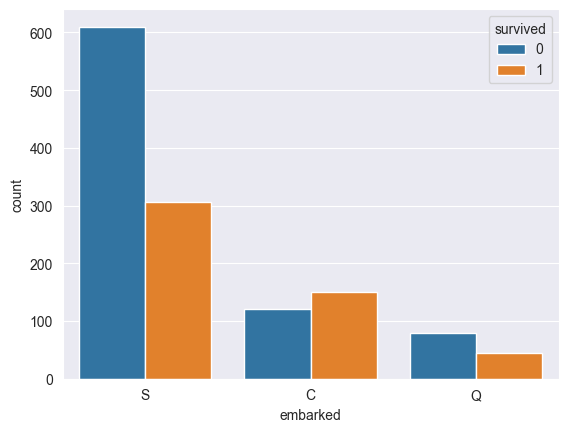

In [10]:
sns.countplot(x='embarked',hue='survived',data=data)

<Axes: xlabel='travelled alone', ylabel='count'>

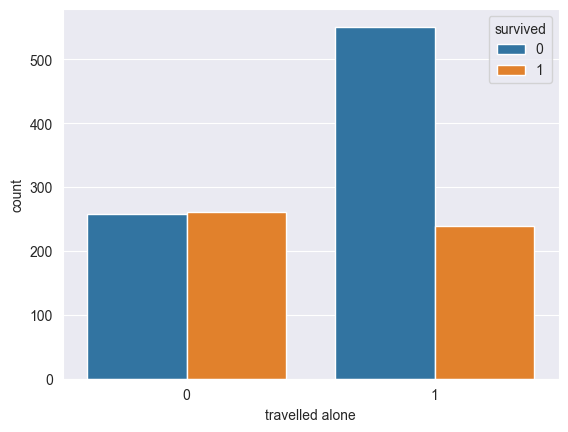

In [11]:
sns.countplot(x='travelled alone',hue='survived',data=data)

#### Data Encoding
---
We encoded string data into integer type using `get_dummies()` method, for our model to work better

In [12]:
data['male'] = pd.get_dummies(data['sex'],drop_first=True).astype(int)
df_em = pd.DataFrame(pd.get_dummies(data['embarked'],drop_first=True).astype(int))

In [13]:
data = pd.concat([data,df_em],axis=1)

In [14]:
data.drop(columns=['sex','embarked'],axis=1,inplace=True)

In [15]:
data.head()

,pclass,age,survived,travelled alone,male,Q,S
0,1,29.0000,1,1,0,0,1
1,1,0.9167,1,0,1,0,1
2,1,2.0000,0,0,0,0,1
3,1,30.0000,0,0,1,0,1
4,1,25.0000,0,0,0,0,1


### Model Application
---
In these cells, application of LogisticRegression model can be seen with data splitting, and accuracy calculation

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X = data.drop(columns=['survived'])
y = data['survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
pred = logreg.predict(X_test)
metrics.accuracy_score(y_test,pred)

0.7786259541984732

In [18]:
metrics.confusion_matrix(y_test,pred)

array([[128,  16],
       [ 42,  76]])